In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
from numpy.linalg import inv
from scipy.fft import fft, fftfreq

import os
import imageio
import time
from IPython.display import Image

%matplotlib inline

# Funções:

In [55]:
def aceleracao(posY,alpha,k,massa):
    size = len(posY)

    aceY = [0.0 for i in range(size)]
    for i in range(1,size-1):
        aceY[i] = (k/massa) * ((posY[i+1] + posY[i-1] - 2*posY[i]) * ( 1.0 + alpha*(posY[i+1]-posY[i-1]) ) )

    return aceY

In [56]:
def velocidade_pado(posY,veloY,alpha,k,massa):
    size = len(posY)

    aceY = aceleracao(posY,alpha,k,massa)

    new_veloY = [0.0 for i in range(size)]
    for i in range(size):
        new_veloY[i] = veloY[i] + 0.5*aceY[i]*dt
        
    return new_veloY

def velocidade_guto(posY,veloY,alpha,k,massa,dt):
    size = len(posY)

    aceY = aceleracao(posY,alpha,k,massa)

    new_veloY = [0.0 for i in range(size)]
    for i in range(1,size-1):
        new_veloY[i] = veloY[i] + aceY[i]*dt

    return new_veloY

In [57]:
def velocidade_final_pado(veloY, aceY):
    size = len(veloY)

    new_veloY = [0.0 for i in range(size)]
    for i in range(size):
        new_veloY[i] = veloY[i] + 0.5*aceY[i]*dt

    return new_veloY

def velocidade_final_guto(veloY, aceY, dt):
    size = len(veloY)

    new_veloY = [0.0 for i in range(size)]
    for i in range(1,size-1):
        new_veloY[i] = veloY[i] + aceY[i]*dt

    return new_veloY

In [58]:
def posicao(posY, new_veloY, dt):
    size = len(posY)

    new_posY = [0.0 for i in range(size)]
    #for i in range(size):
    for i in range(1,size-1):
        new_posY[i] = posY[i] + new_veloY[i]*dt

    return new_posY

In [59]:
def mode_energy(x, x_old, n_particles, L, dt):
    """energy of mode L"""
    tmp = np.arange(0, n_particles, 1)
    tmp[-1:] = 0
    m = np.sqrt(2.0 / (n_particles)) * np.dot(x, np.sin( ( 2 * tmp * L * np.pi / (n_particles) ) ))
    m_old = np.sqrt(2.0 / (n_particles)) * np.dot(x_old, np.sin( ( 2 * tmp * L * np.pi / (n_particles) ) ))
    #return 0.5 * (m - m_old)**2 + 0.5 * (m + m_old)**2 * np.sin( np.pi * L / (2 * (n_particles)) )**2
    return 0.5 * (m - m_old)**2 / dt**2 + (0.5 * (m + m_old)**2 * np.sin( np.pi * L / (2 * (n_particles)) )**2)
        
    #m = np.sqrt(2.0 / (n_particles + 1)) * np.dot(x, np.sin( ( tmp * L * np.pi / (n_particles + 1) ) ))
    #m_old = np.sqrt(2.0 / (n_particles + 1)) * np.dot(x_old, np.sin( ( tmp * L * np.pi / (n_particles + 1) ) ))
    #return 0.5 * (m - m_old)**2 / dt**2 + 0.5 * (m + m_old)**2 * np.sin( np.pi * L / (2 * (n_particles + 1)) )**2

In [60]:
def plota_figura(posX, posY, N, dt,tempo):
    figname = 'f.jpeg'
    plt.figure(figsize=(5,3))
    plt.xlabel('Posição X')
    plt.ylabel('Posição Y')
    plt.ylim(-1.05, 1.05)
    plt.title('FPU - Posições das partículas. Iterações = {}'.format(tempo/dt))

    x = []
    y = []
    #tamanho_step_pra_mostrar_N = int(N/(N*dt))
    tamanho_step_pra_mostrar_N = 1                 # quero mostrar todos
    for i in range(0, len(posX), tamanho_step_pra_mostrar_N):
        x.append(posX[i])
        y.append(posY[i])

    plt.scatter(x, y, c='r', s=5)
    plt.grid()
    plt.savefig(figname)            
    plt.close()
    images.append(imageio.imread(figname))
    os.remove(figname)

# Simulação

Tamanho x: 25
Tamanho y: 25
Zero =  0.0


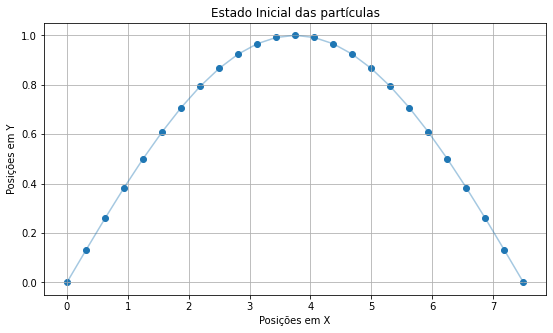

In [61]:
### SIMULAÇÃO:

# Definições
N = 25
periodo = 1         # han???????
pi = np.pi
massa = 1.0
k = 1.0
alpha = 1.0
beta = 0.0
init_mode = 1
lamb = 2/init_mode

dt = 0.3
step = dt
intervalo_imagem = 100


# --- Estado inicial ---
posX = np.linspace(0,N*dt,N)
posY = np.sin(2* periodo * posX * pi/(lamb*N*dt))
posY[-1:] = 0
veloY = [0.0 for i in range(N)]
print("Tamanho x:",len(posX))
print("Tamanho y:",len(posY))
print("Zero = ",posY[-1])
#print(posX)
plt.figure(figsize=(9,5))
plt.ylabel("Posições em Y")
plt.xlabel("Posições em X")
plt.title("Estado Inicial das partículas")
plt.plot(posX, posY,alpha=0.4)
plt.scatter(posX, posY)
plt.grid()
plt.show()
plt.close()

Continuando o código...
Agora iterando no tempo...


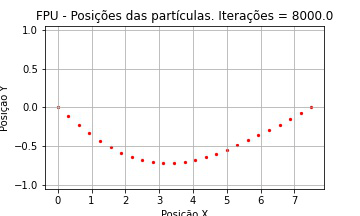

In [62]:
# Simulação 2

# --- Estado inicial ---
posX = np.linspace(0,N*dt,N)
posY = np.sin(2* periodo * posX * pi/(lamb*N*dt))
posY[-1:] = 0
veloY = [0.0 for i in range(N)]

print("Continuando o código...")

images = []
figname = 'f.jpeg'

posY_old = posY.copy()
energia1 = []
energia2 = []
energia3 = []
energia4 = []

print("Agora iterando no tempo...")

t = 0
tempo = 8000*dt
contador_fig = 0
while(t < tempo):
  
    if(contador_fig == intervalo_imagem):
        plota_figura(posX,posY,N,dt,tempo)
        #fft_vet, yf = fazerFFT(posY, step, fft_vet)
        #plota_fft(yf, t)
        contador_fig = 0

    ##############
    #guto:
    #new_aceY = aceleracao(posY_old,alpha,k,massa)
    #veloY = velocidade_final_guto(veloY, new_aceY,dt)
    #posY = posicao(posY_old, veloY, dt)
    
    
    ##############
    ## pado:
    ## calcula v(t + 0.5dt) = v(t) + 0.5*a(t)*dt
    new_veloY = velocidade_pado(posY,veloY,alpha,k,massa)

    ## calcula x(t+dt) = x(t) + v(t+0.5dt)*dt
    posY = posicao(posY, new_veloY, dt)

    ## Calcula a(t+dt)
    new_aceY = aceleracao(posY,alpha,k,massa)

    ## Calcula v(t+dt)
    veloY = velocidade_final_pado(new_veloY, new_aceY)

    # energia dos modos:
    energia1.append( mode_energy(posY, posY_old, N, 0.5, dt) )  
    energia2.append( mode_energy(posY, posY_old, N, 1, dt) )
    energia3.append( mode_energy(posY, posY_old, N, 1.5, dt) )
    energia4.append( mode_energy(posY, posY_old, N, 2, dt) )
    
    posY_old = posY.copy()
    
    t = t + dt
    contador_fig = contador_fig + 1
    # aqui acaba o while de iteração no tempo

np.fft.fft(energia1)      # isso aqui "filtra o sinal" deixando apenas "frequências baixas" 
np.fft.fft(energia2)
np.fft.fft(energia3)
np.fft.fft(energia4)

plt.close()
imageio.mimsave('trab2.gif', images,fps=30)
Image(open('trab2.gif','rb').read())
# imageio.mimsave('fft.gif', images_fft,fps=30)

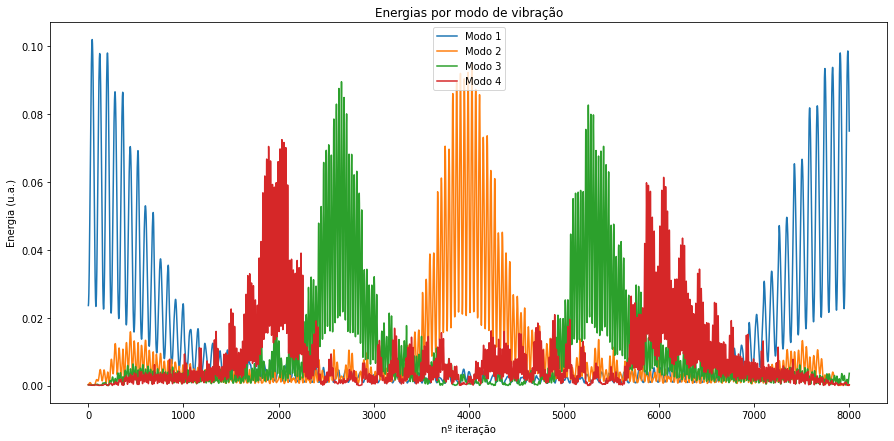

In [65]:
plt.figure(figsize=(15,7))
plt.title('Energias por modo de vibração')
plt.xlabel("nº iteração")
plt.ylabel("Energia (u.a.)")
plt.plot(energia1,label="Modo 1")
plt.plot(energia2,label="Modo 2")
plt.plot(energia3,label="Modo 3")
plt.plot(energia4,label="Modo 4")
plt.legend()

-----

# Frequencias
## Tentativas:

Não muito bem sucedidas:

2400


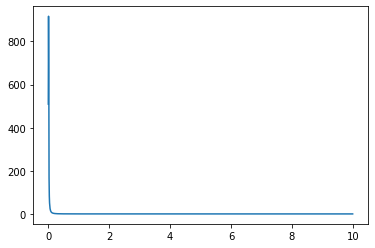

509.2951633954273
916.7318177104551
654.8095632204759
169.76592713201143
[509.2951634  916.73181771 654.80956322 169.76592713  83.33997016]


In [64]:
from scipy.fft import fft, fftfreq

step = 0.05
periodo = 3
N = 120
posX = np.arange(0, N, step)
posY = np.sin(periodo * posX * pi/N)

# Number of samples in normalized_tone
print(len(posY))

yf = fft(posY)
xf = fftfreq(len(posY), step)

xf = xf[0:int(len(xf)/2.0)]
yf = np.abs(yf)[0:int(len(yf)/2.0)]

plt.plot(xf, yf)
plt.show()

print(yf[0])
print(yf[1])
print(yf[2])
print(yf[3])
print(yf[0:5])

# Pado
def fazerFFT(posY, step, fft_vet):
    yf = fft(posY)
    yf = np.abs(yf)[0:int(len(yf)/2.0)]
    soma = np.sum(yf)
    
    for i in range(len(fft_vet)):
        fft_vet[i].append(yf[i] / soma)
  
    return fft_vet, yf/soma

def plot_energy(posY,YY,ax,nmodes=5):
    J = len(posY)
    omega = (2*np.sin(np.pi*np.arange(J)/J)) # freq
    dists = 0*YY[0]  # q q eh isso aqui vei
    for m in range(1,nmodes):
        E_p = 105*np.abs(omega[m]*np.array([np.fft.fft(np.diff(YY[i]))[m] for i in range(1,len(YY)-1)]))**2
        E_k = np.abs(np.array([np.fft.fft((YY[i+1]-YY[i-1])/(2*dt))[m] for i in range(1,len(YY)-1)]))**2
        ax.plot(E_p+E_k)
    ax.legend([str(m) for m in range(1,nmodes)],title='Mode')
    ax.set_xlabel('t')
    ax.set_ylabel('Energy')
    
def plota_fft(fft_vet, tempo):
    figname = 'fft.jpeg'
    plt.xlabel('X')
    plt.ylabel('Nada')
    plt.ylim(0,1.01)
    plt.title('FFT {}'.format(tempo))

    x = [i for i in range(len(fft_vet))]
    plt.scatter(x, fft_vet)
    plt.grid()
    plt.savefig(figname)            
    plt.close()
    images_fft.append(imageio.imread(figname))
    os.remove(figname)